# Energy Data Exploration Report
This report is generated using a custom package. Note that the mean values in the report may not be very meaningful, because there are aggregated time series in the data. 

In [13]:
import os
import warnings
warnings.simplefilter("ignore")
from ftk import TimeSeriesDataFrame
import pandas as pd
%matplotlib inline

train_data_dir = '../data/train'
test_data_dir = '../data/test'

## Explore Training Data

Combine train_base.csv and train_round_6.csv to get the entire training dataset. 

In [14]:
train_base = pd.read_csv(os.path.join(train_data_dir, 'train_base.csv'))
train_round_6 = pd.read_csv(os.path.join(train_data_dir, 'train_round_6.csv'))
train_all = pd.concat([train_base, train_round_6])
train_all.head()

,Datetime,DEMAND,DewPnt,DryBulb,Zone,Holiday
0,2011-01-01 01:00:00,1048.00,28,31,ME,0
1,2011-01-01 01:00:00,1044.00,26,28,NH,0
2,2011-01-01 01:00:00,575.00,35,43,VT,0
3,2011-01-01 01:00:00,3053.00,27,33,CT,0
4,2011-01-01 01:00:00,775.00,28,31,RI,0


Convert pandas data frame to TimeSeriesDataFrame to use the data exploration tool in AML Forecasting Package.

In [15]:
train_tsdf = TimeSeriesDataFrame(train_all, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
train_tsdf.head()

DEMAND  DewPnt  DryBulb  Holiday
Datetime            Zone                                  
2011-01-01 01:00:00 ME   1048.00      28       31        0
                    NH   1044.00      26       28        0
                    VT    575.00      35       43        0
                    CT   3053.00      27       33        0
                    RI    775.00      28       31        0

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 540000 entries, (2011-01-01 01:00:00, ME) to (2017-02-28 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     540000 non-null float64
DewPnt     540000 non-null int64
DryBulb    540000 non-null int64
Holiday    540000 non-null int64
dtypes: float64(1), int64(3)
memory usage: 19.5+ MB
--------------------------  Numerical Variable Summary  --------------------------
         DEMAND    DewPnt   DryBulb   Holiday
count 540000.00 540000.00 540000.00 540000.00
mean    3519.46     38.27     49.92      0.15
std     4091.15     19.87     19.07      1.01
min      365.00    -29.00    -20.00      0.00
25%     1163.04     24.00     35.00      0.00
50%     1823.22     40.00     50.00      0.00
75%     3625.00     55.00     65.00      0.00
max    27334.00     78.00    102.00     10.00
------------------------------  Time Series Summary  ------

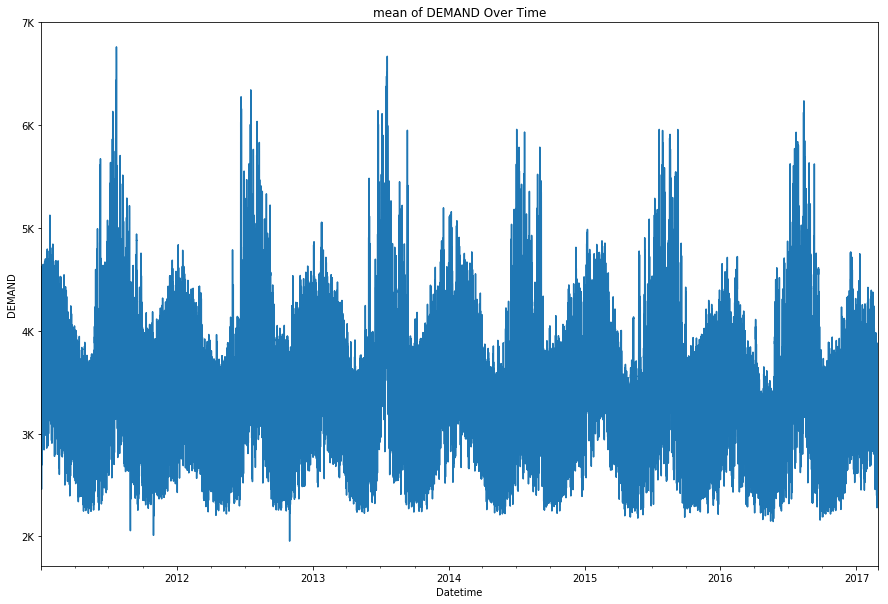

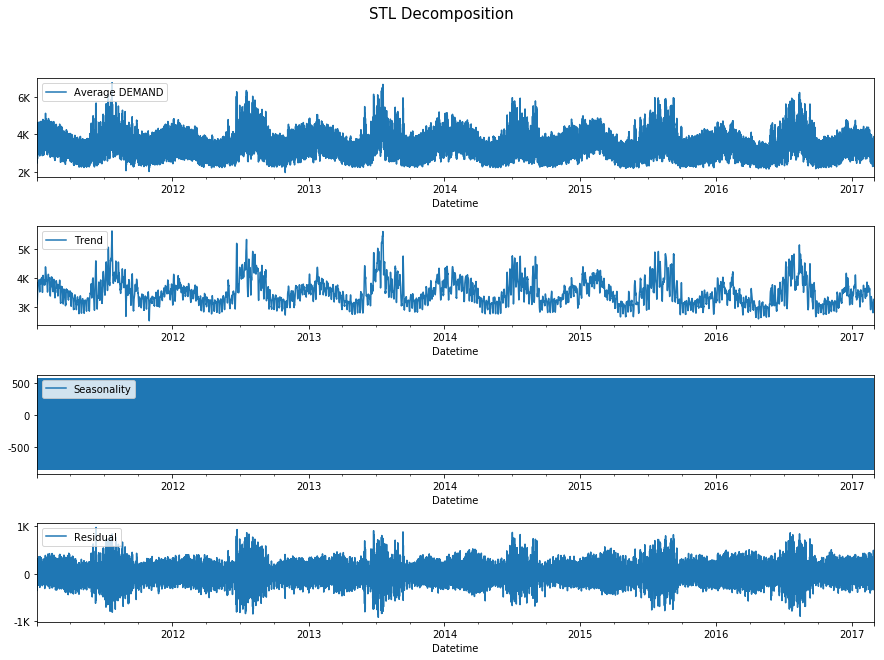

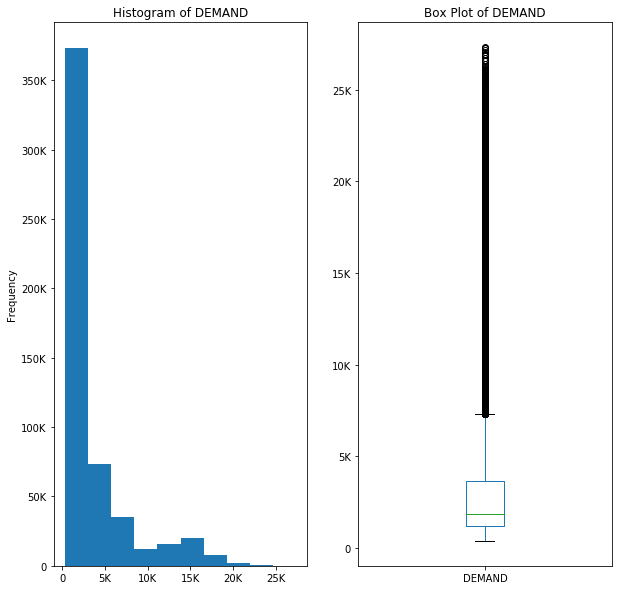

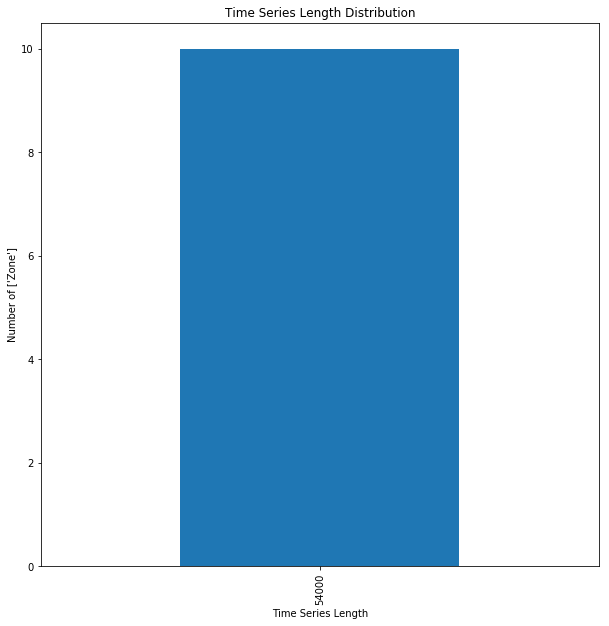

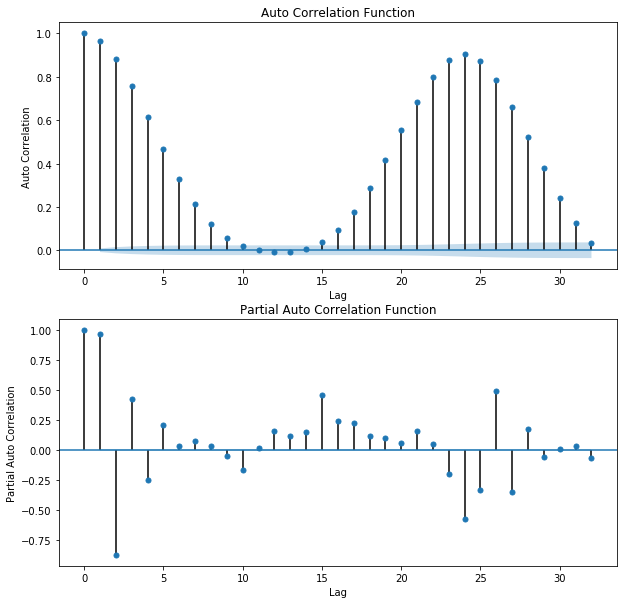

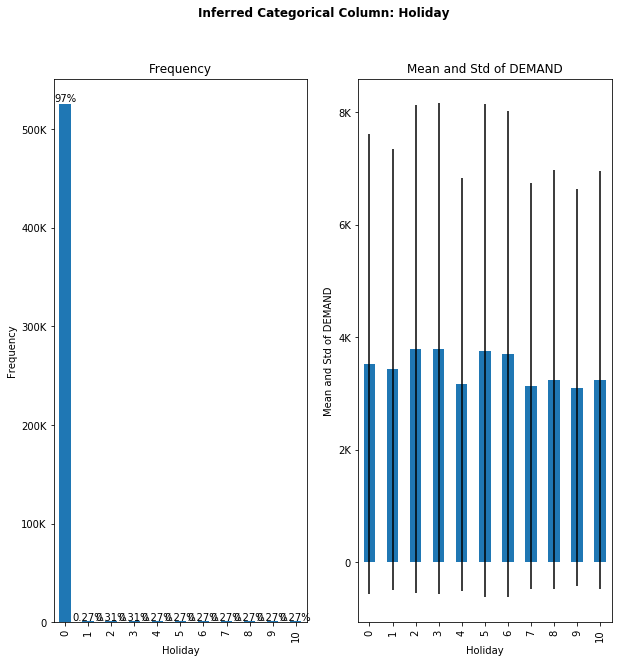

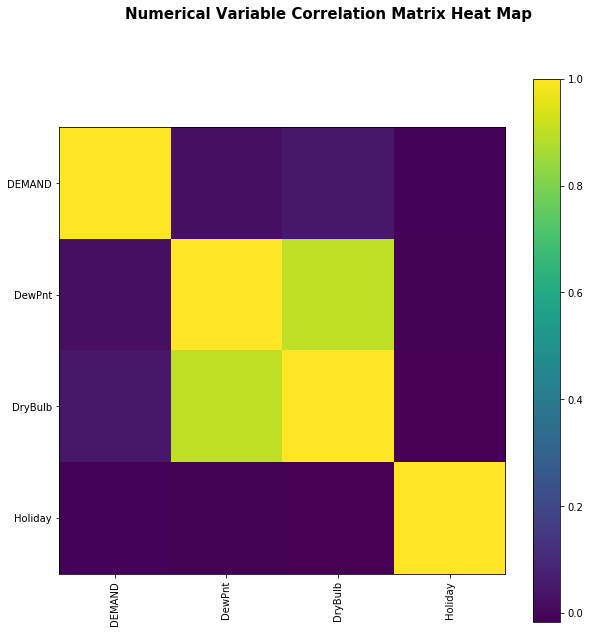

In [16]:
train_tsdf.ts_report()

Check data with zero DEMAND values. We found these zero values are caused by clock change on the first day of DST. This seems to be fixed in 2016 data. 

In [17]:
train_tsdf.loc[train_tsdf['DEMAND']==0, 'DEMAND']

Series([], Name: DEMAND, dtype: float64)

## Explore Testing Data

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 7440 entries, (2017-01-01 01:00:00, ME) to (2017-02-01 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     7440 non-null float64
DewPnt     7440 non-null int64
DryBulb    7440 non-null int64
Holiday    7440 non-null int64
dtypes: float64(1), int64(3)
memory usage: 260.3+ KB
--------------------------  Numerical Variable Summary  --------------------------
        DEMAND  DewPnt  DryBulb  Holiday
count  7440.00 7440.00  7440.00  7440.00
mean   3485.27   22.47    32.26     0.10
std    3986.75   12.62    10.03     0.39
min     482.28  -10.00    -5.00     0.00
25%    1182.71   13.00    26.00     0.00
50%    1802.19   23.00    34.00     0.00
75%    3550.77   32.00    39.00     0.00
max   19304.51   52.00    60.00     2.00
------------------------------  Time Series Summary  -----------------------------
Number of time series         

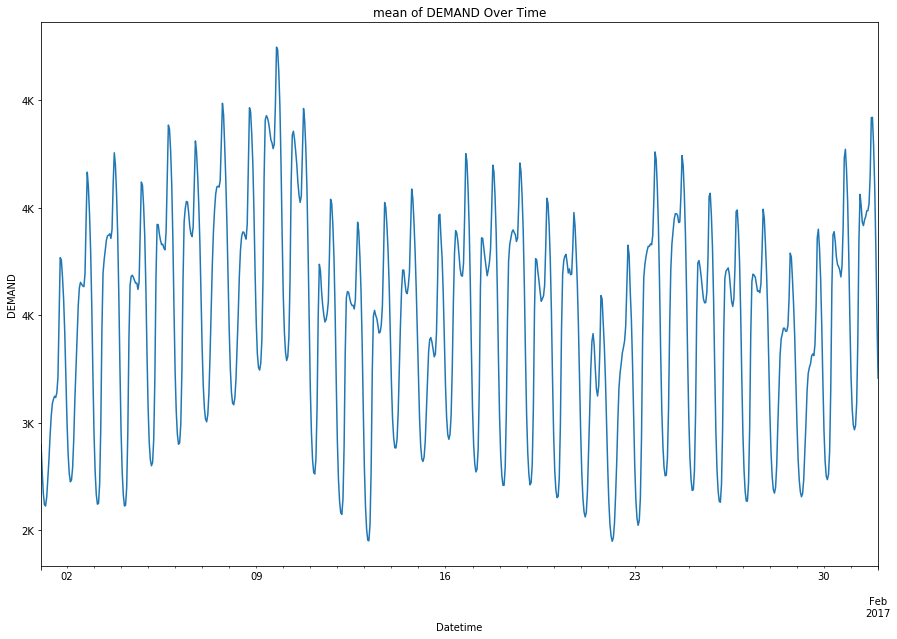

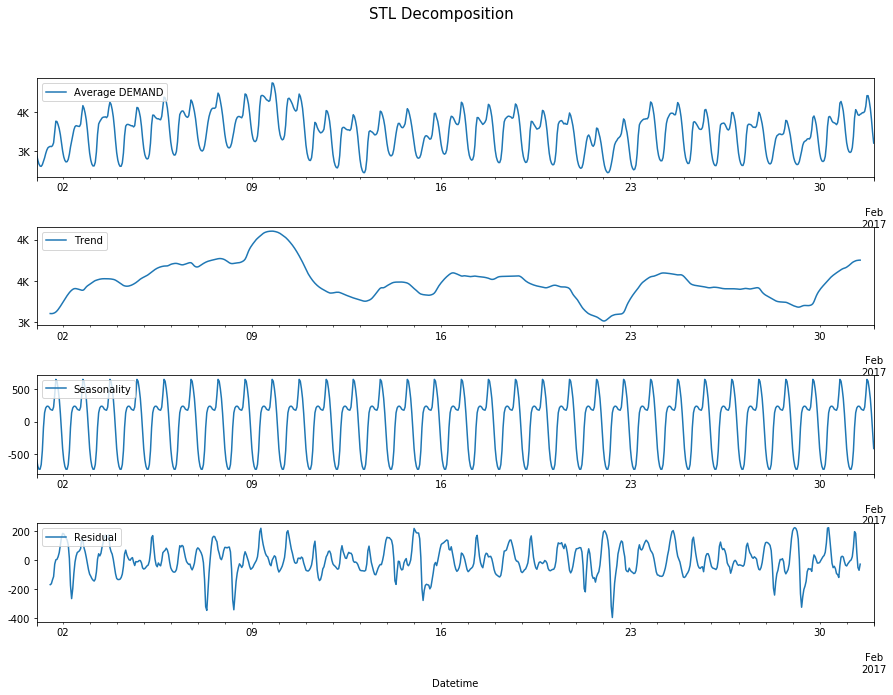

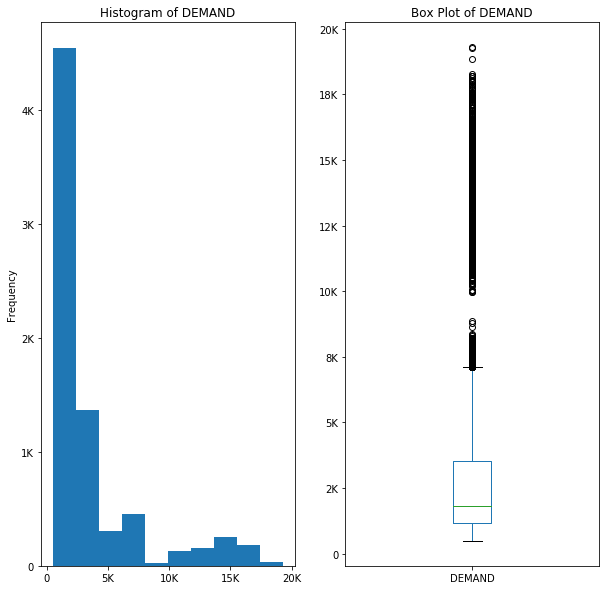

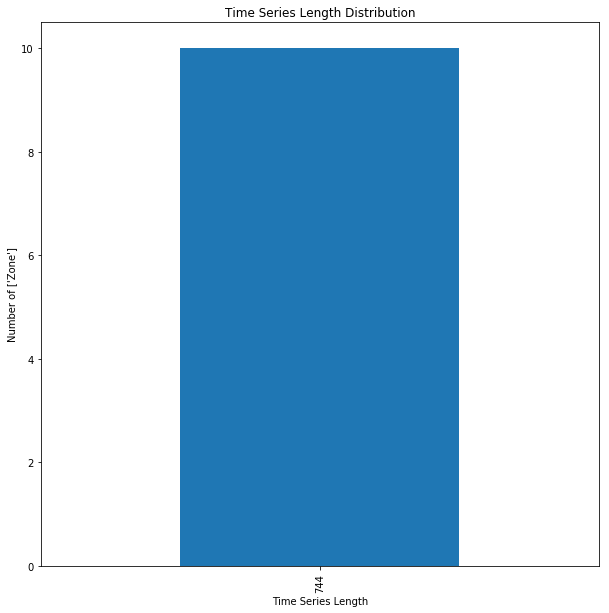

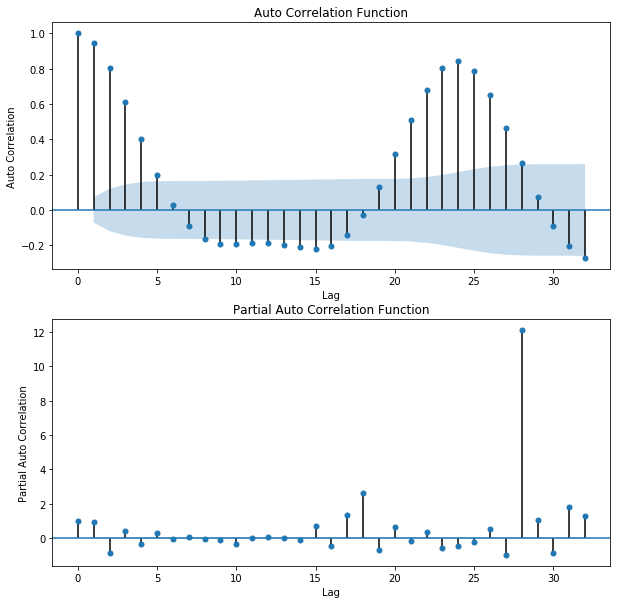

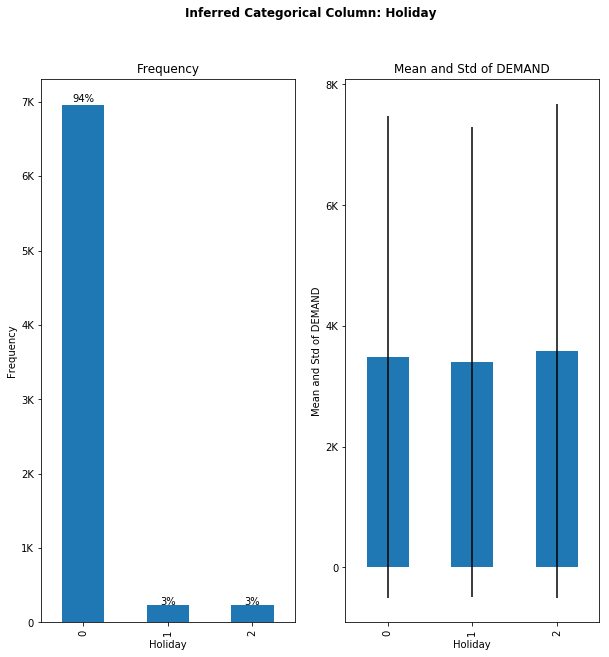

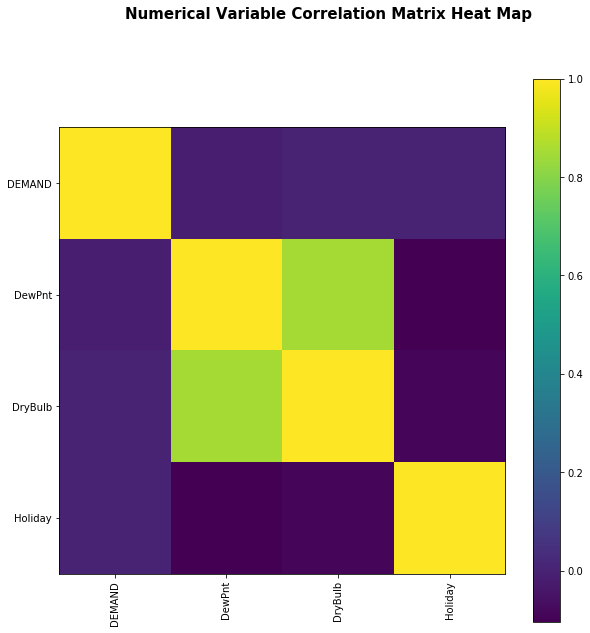

In [18]:
test_round_1 = pd.read_csv(os.path.join(test_data_dir, 'test_round_1.csv'))
test_round_1_tsdf = TimeSeriesDataFrame(test_round_1, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
test_round_1_tsdf.ts_report()

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 6720 entries, (2017-02-01 01:00:00, ME) to (2017-03-01 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     6720 non-null float64
DewPnt     6720 non-null int64
DryBulb    6720 non-null int64
Holiday    6720 non-null int64
dtypes: float64(1), int64(3)
memory usage: 235.1+ KB
--------------------------  Numerical Variable Summary  --------------------------
        DEMAND  DewPnt  DryBulb  Holiday
count  6720.00 6720.00  6720.00  6720.00
mean   3397.13   21.68    33.29     0.11
std    3882.31   12.56    11.64     0.56
min     488.19  -13.00     2.00     0.00
25%    1156.54   13.00    25.00     0.00
50%    1753.30   19.00    32.00     0.00
75%    3403.93   30.00    40.00     0.00
max   17903.36   57.00    72.00     3.00
------------------------------  Time Series Summary  -----------------------------
Number of time series         

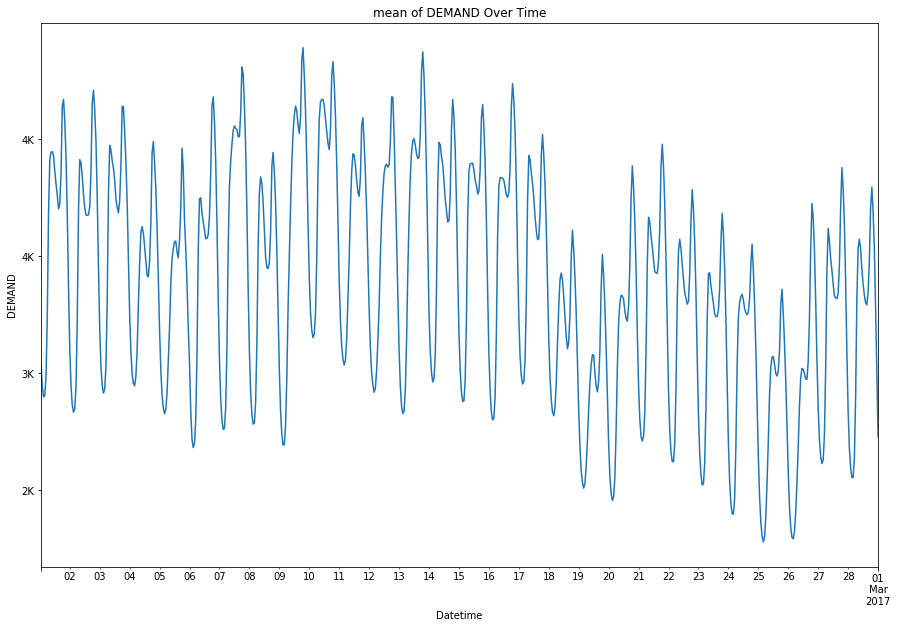

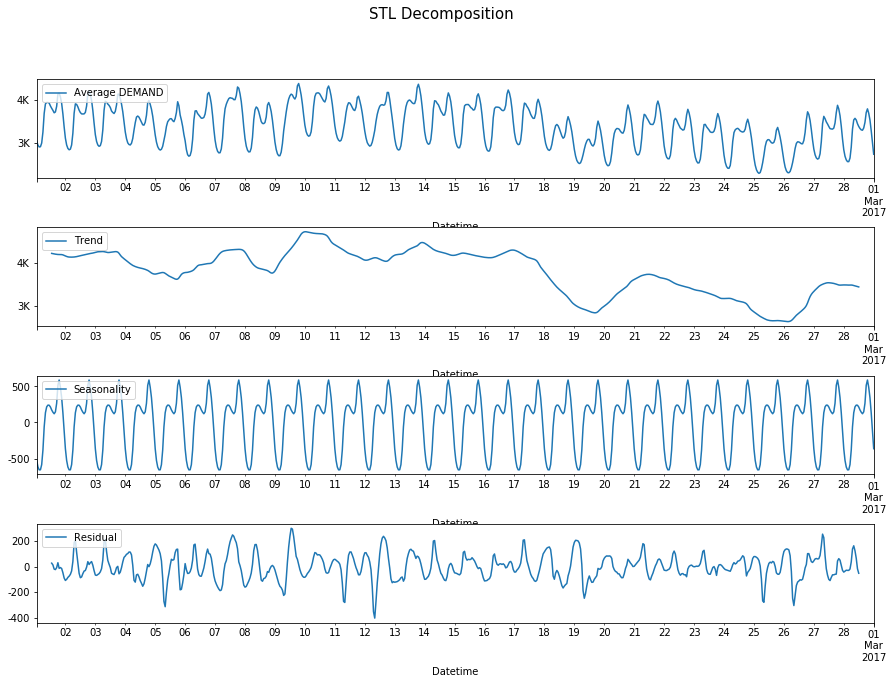

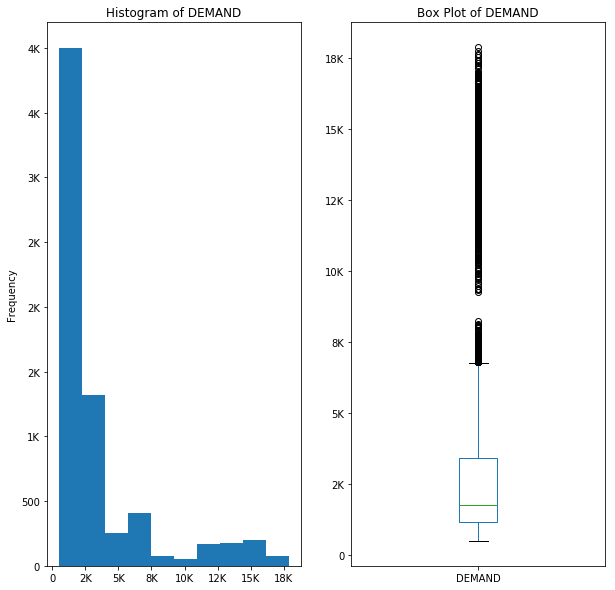

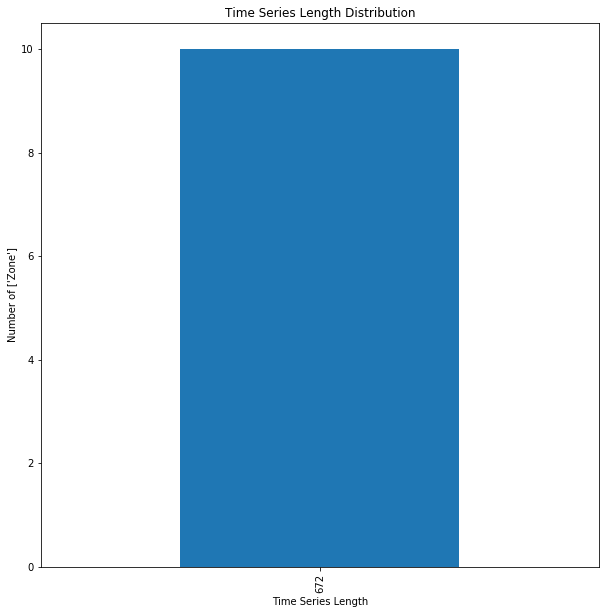

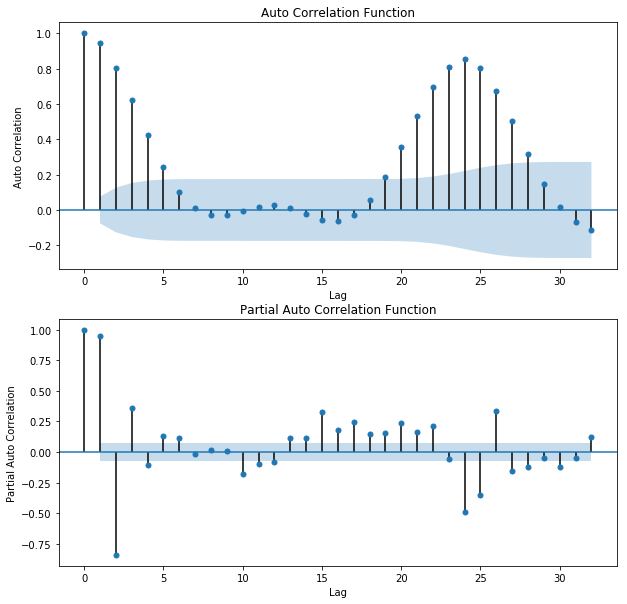

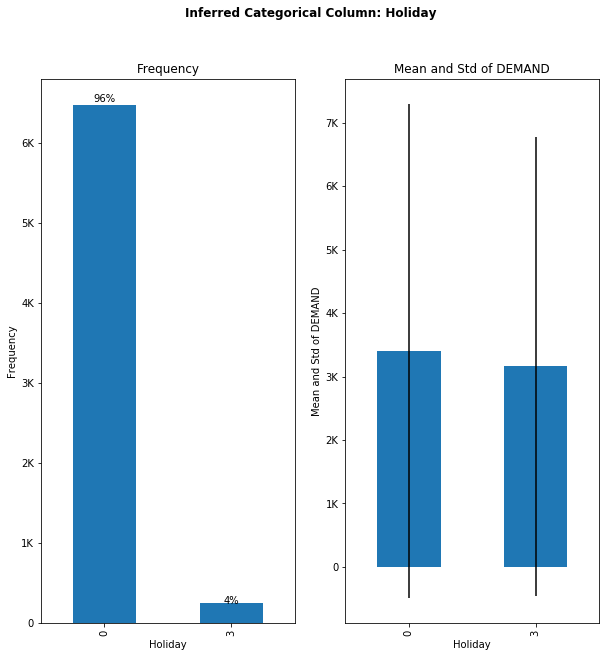

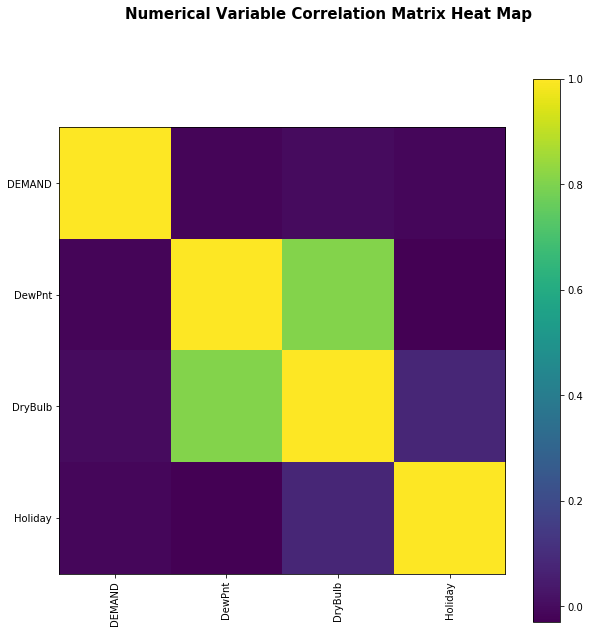

In [19]:
test_round_2 = pd.read_csv(os.path.join(test_data_dir, 'test_round_2.csv'))
test_round_2_tsdf = TimeSeriesDataFrame(test_round_2, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
test_round_2_tsdf.ts_report()

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 6720 entries, (2017-02-01 01:00:00, ME) to (2017-03-01 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     6720 non-null float64
DewPnt     6720 non-null int64
DryBulb    6720 non-null int64
Holiday    6720 non-null int64
dtypes: float64(1), int64(3)
memory usage: 235.1+ KB
--------------------------  Numerical Variable Summary  --------------------------
        DEMAND  DewPnt  DryBulb  Holiday
count  6720.00 6720.00  6720.00  6720.00
mean   3397.13   21.68    33.29     0.11
std    3882.31   12.56    11.64     0.56
min     488.19  -13.00     2.00     0.00
25%    1156.54   13.00    25.00     0.00
50%    1753.30   19.00    32.00     0.00
75%    3403.93   30.00    40.00     0.00
max   17903.36   57.00    72.00     3.00
------------------------------  Time Series Summary  -----------------------------
Number of time series         

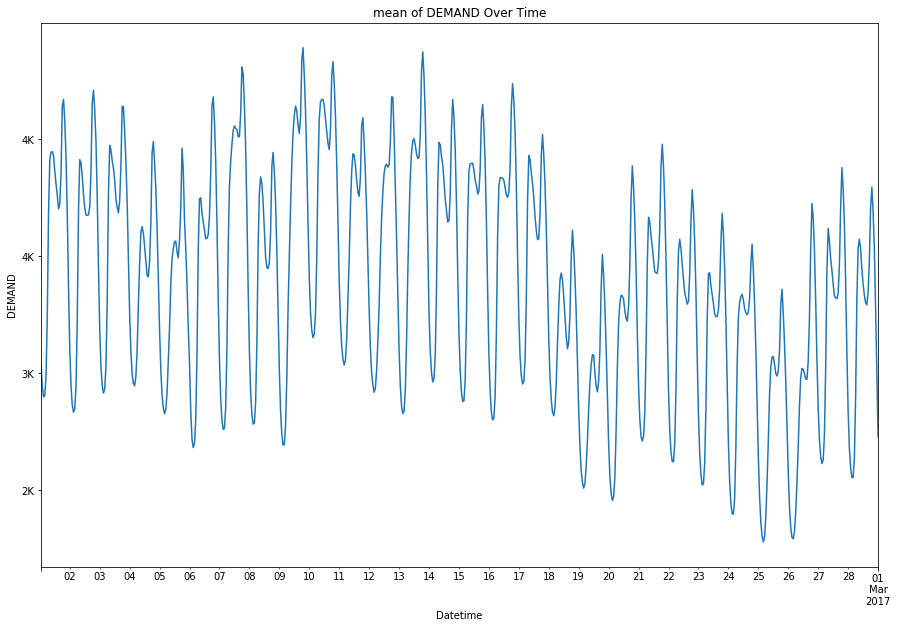

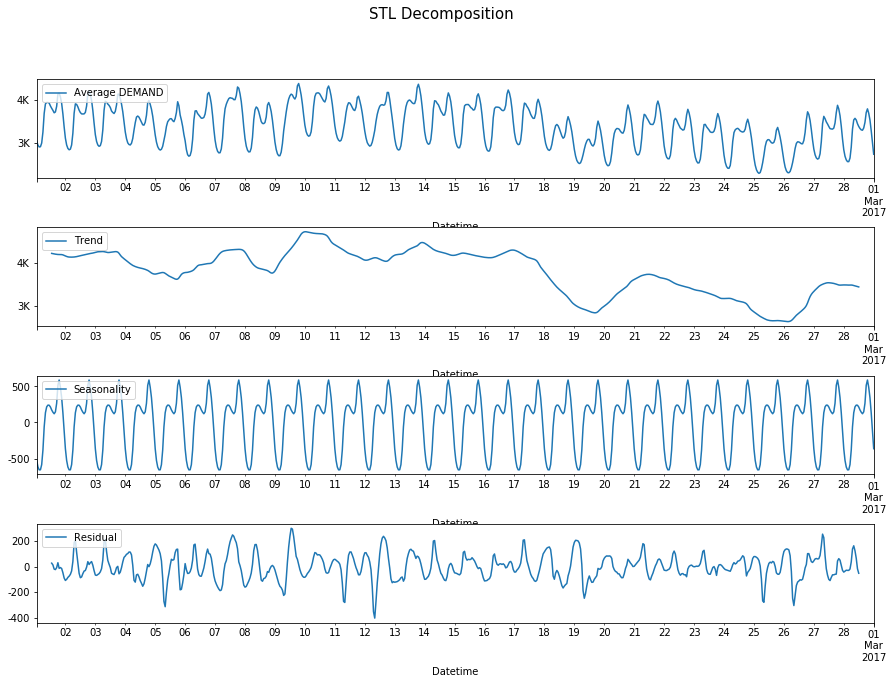

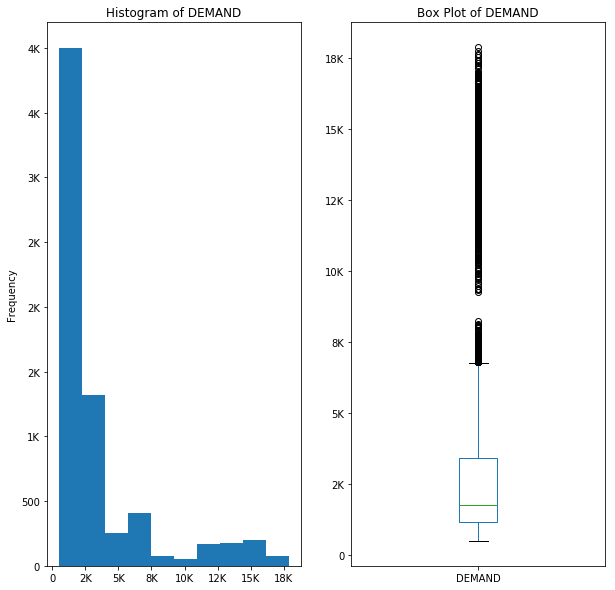

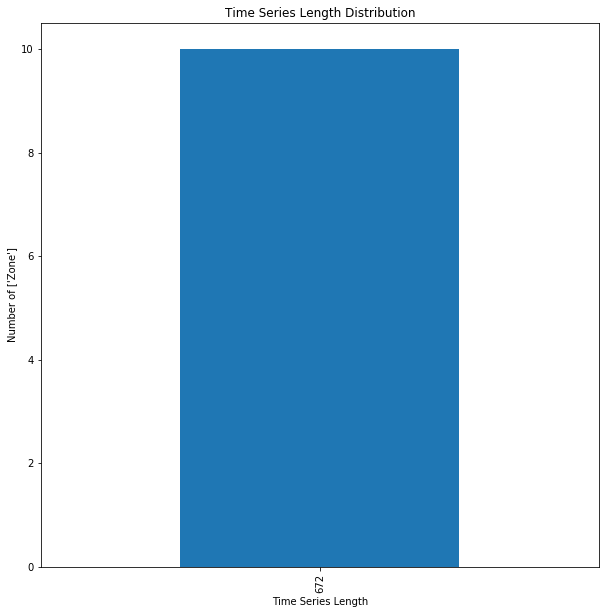

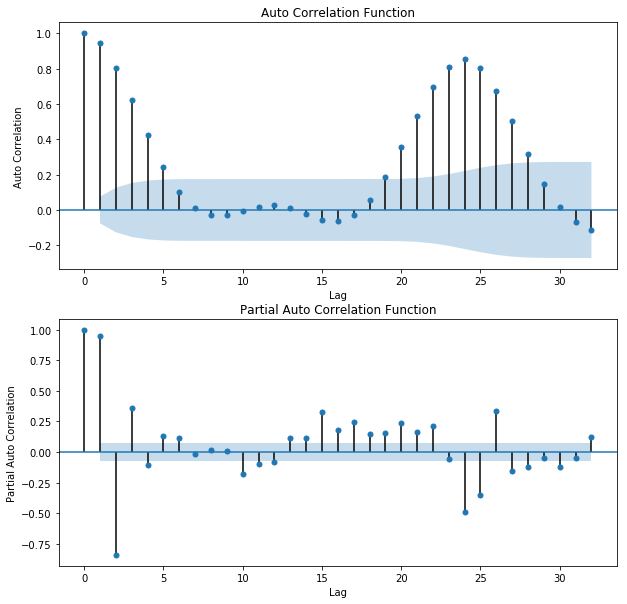

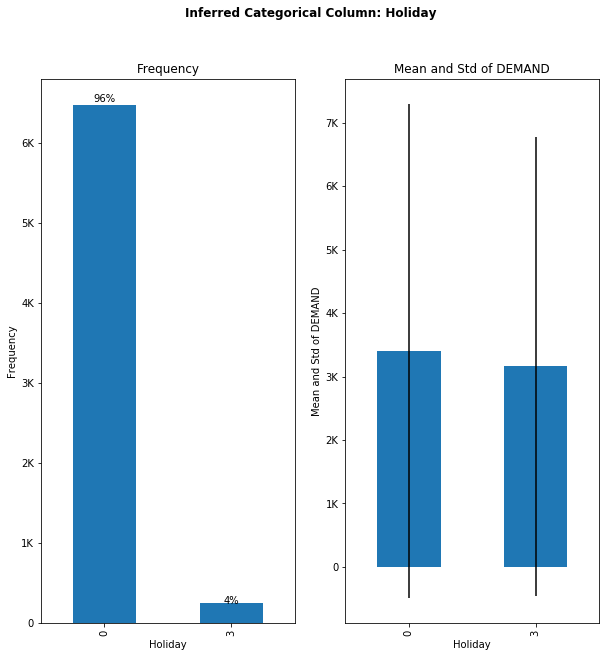

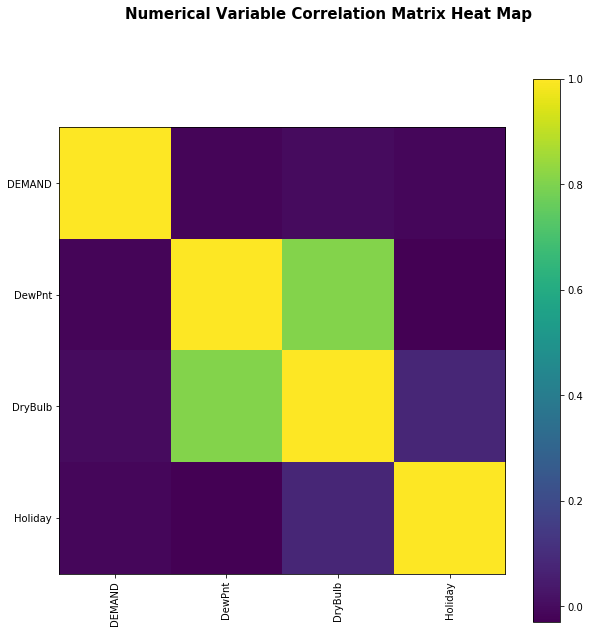

In [20]:
test_round_3 = pd.read_csv(os.path.join(test_data_dir, 'test_round_3.csv'))
test_round_3_tsdf = TimeSeriesDataFrame(test_round_3, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
test_round_3_tsdf.ts_report()

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 7440 entries, (2017-03-01 01:00:00, ME) to (2017-04-01 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     7440 non-null float64
DewPnt     7440 non-null int64
DryBulb    7440 non-null int64
Holiday    7440 non-null int64
dtypes: float64(1), int64(3)
memory usage: 260.3+ KB
--------------------------  Numerical Variable Summary  --------------------------
        DEMAND  DewPnt  DryBulb  Holiday
count  7440.00 7440.00  7440.00  7440.00
mean   3389.56   16.12    31.80     0.00
std    3859.46   16.19    11.51     0.00
min     482.33  -19.00     0.00     0.00
25%    1170.96    4.00    24.00     0.00
50%    1759.97   16.00    33.00     0.00
75%    3407.05   28.00    39.00     0.00
max   17183.53   57.00    63.00     0.00
------------------------------  Time Series Summary  -----------------------------
Number of time series         

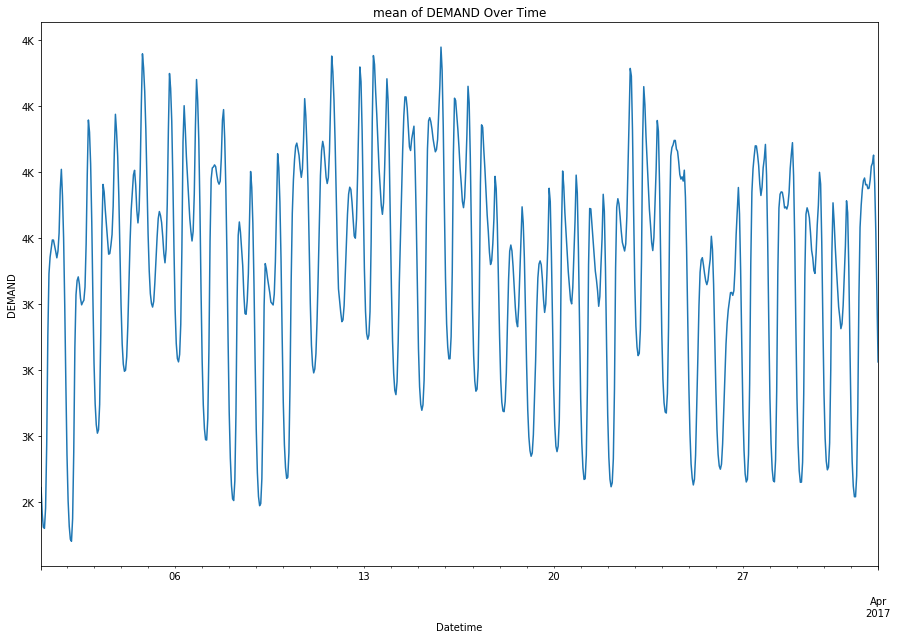

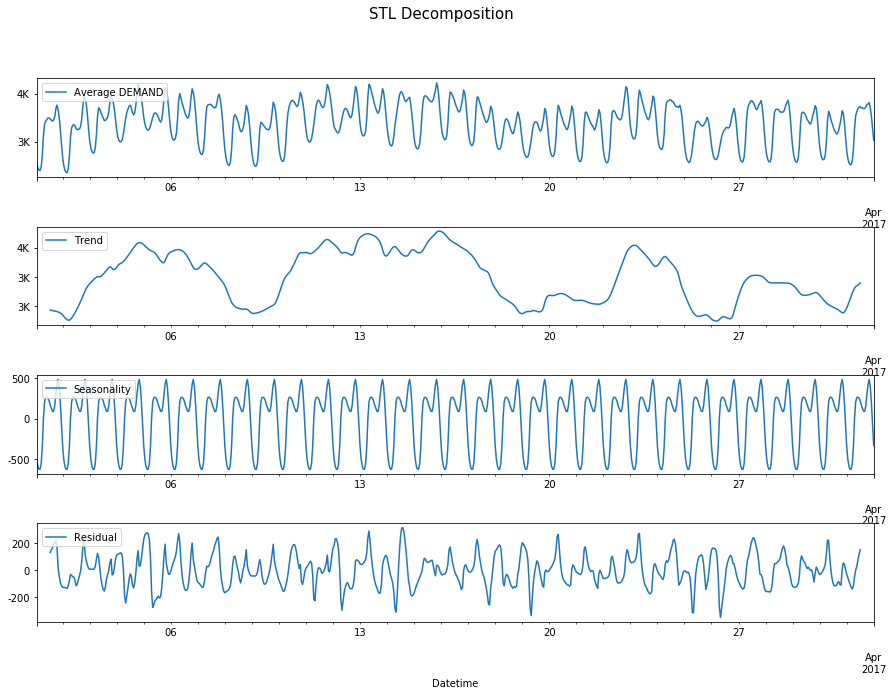

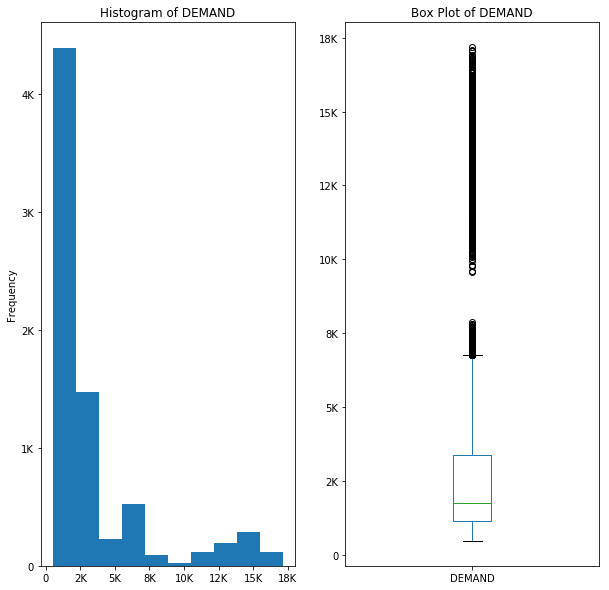

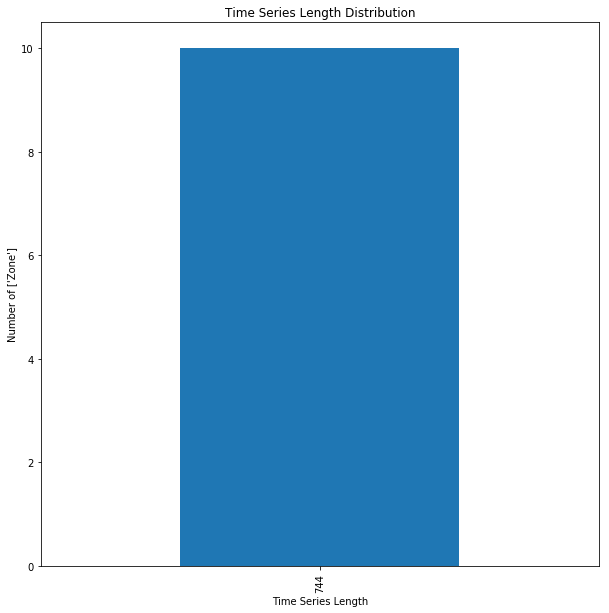

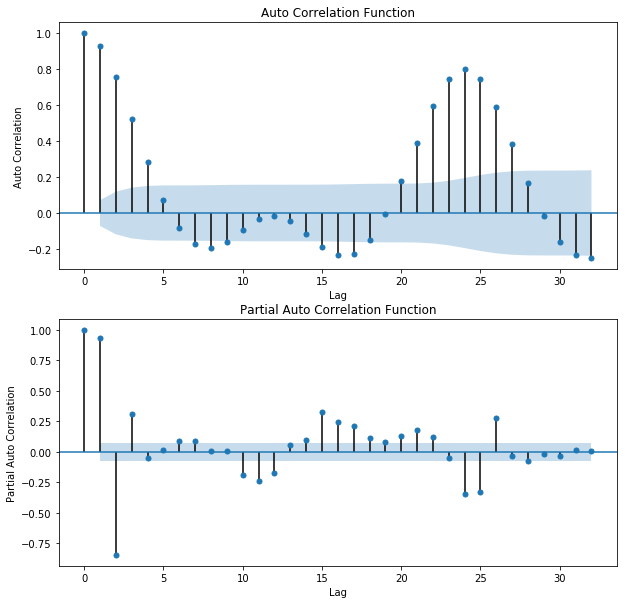

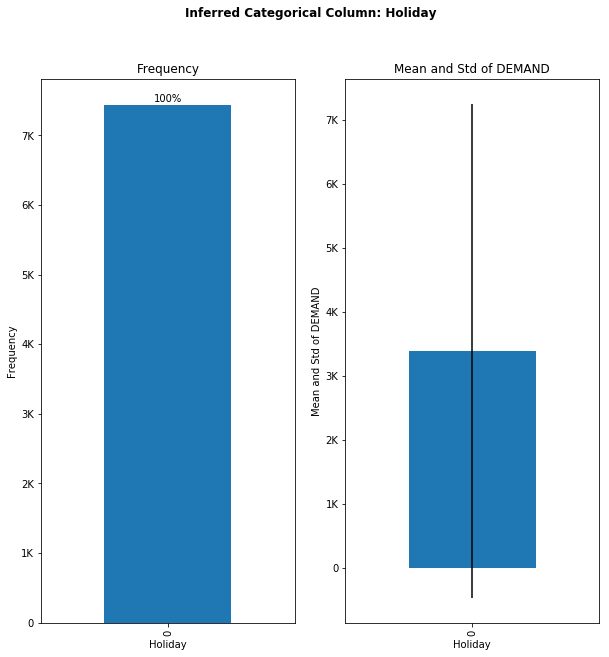

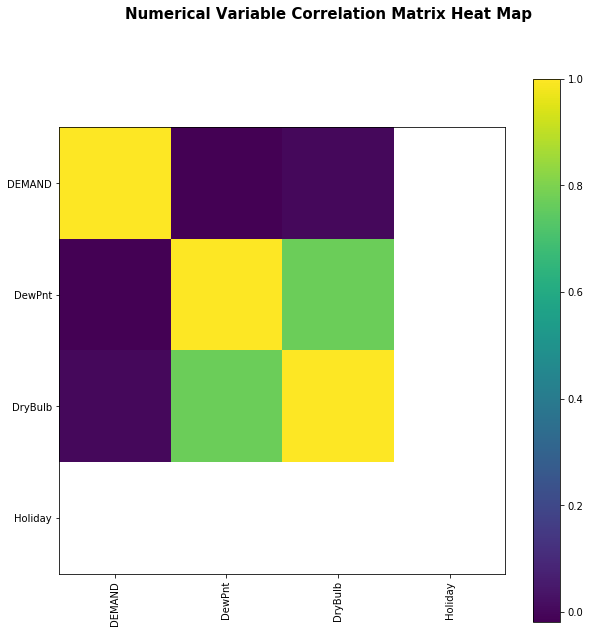

In [21]:
test_round_4 = pd.read_csv(os.path.join(test_data_dir, 'test_round_4.csv'))
test_round_4_tsdf = TimeSeriesDataFrame(test_round_4, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
test_round_4_tsdf.ts_report()

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 7440 entries, (2017-03-01 01:00:00, ME) to (2017-04-01 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     7440 non-null float64
DewPnt     7440 non-null int64
DryBulb    7440 non-null int64
Holiday    7440 non-null int64
dtypes: float64(1), int64(3)
memory usage: 260.3+ KB
--------------------------  Numerical Variable Summary  --------------------------
        DEMAND  DewPnt  DryBulb  Holiday
count  7440.00 7440.00  7440.00  7440.00
mean   3389.56   16.12    31.80     0.00
std    3859.46   16.19    11.51     0.00
min     482.33  -19.00     0.00     0.00
25%    1170.96    4.00    24.00     0.00
50%    1759.97   16.00    33.00     0.00
75%    3407.05   28.00    39.00     0.00
max   17183.53   57.00    63.00     0.00
------------------------------  Time Series Summary  -----------------------------
Number of time series         

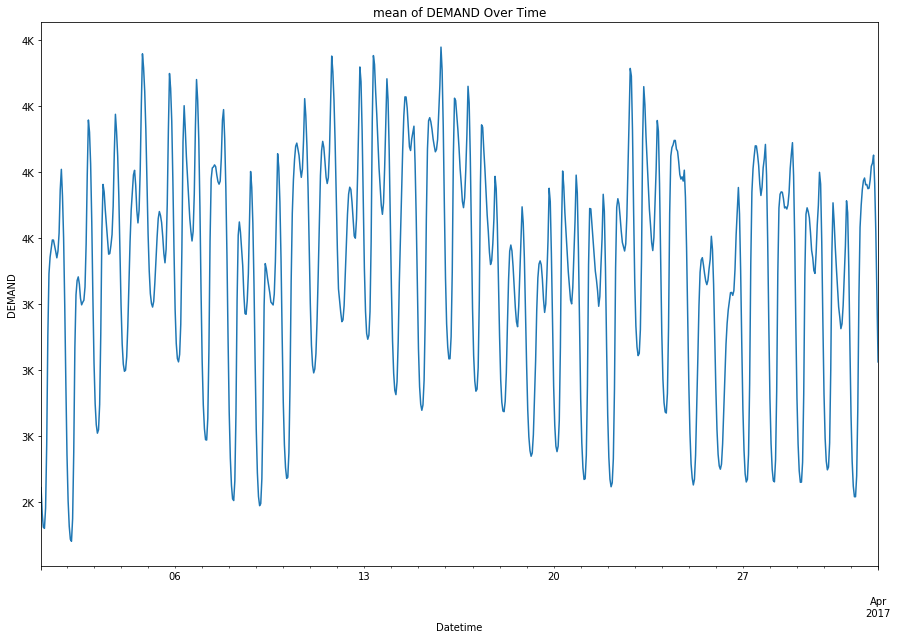

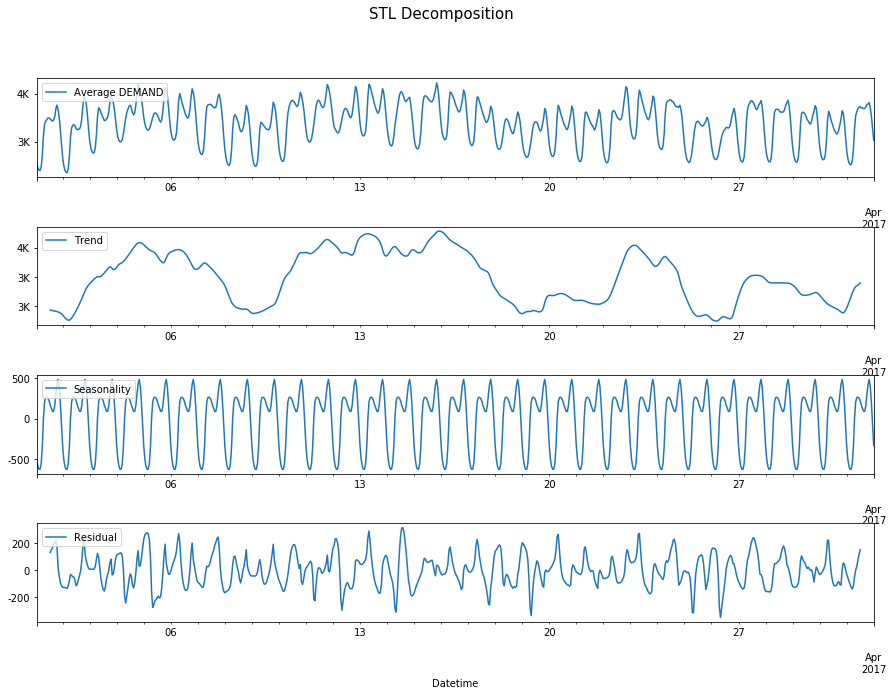

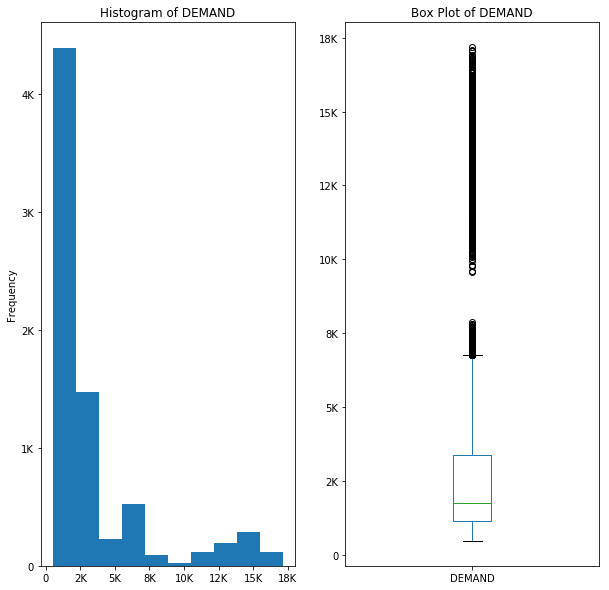

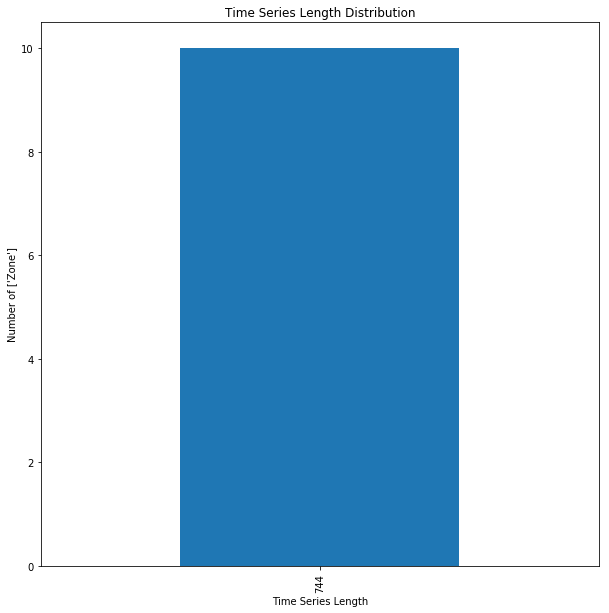

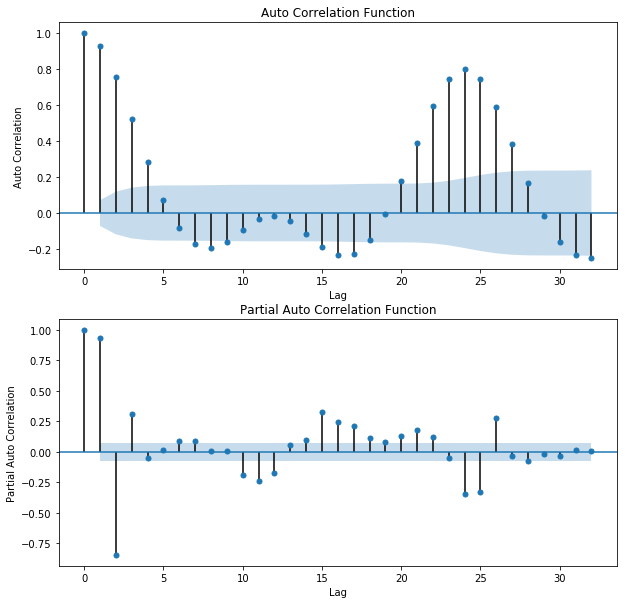

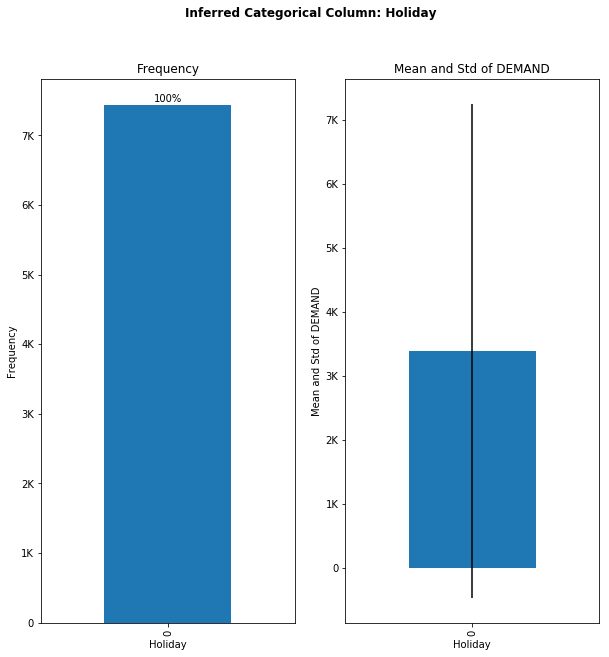

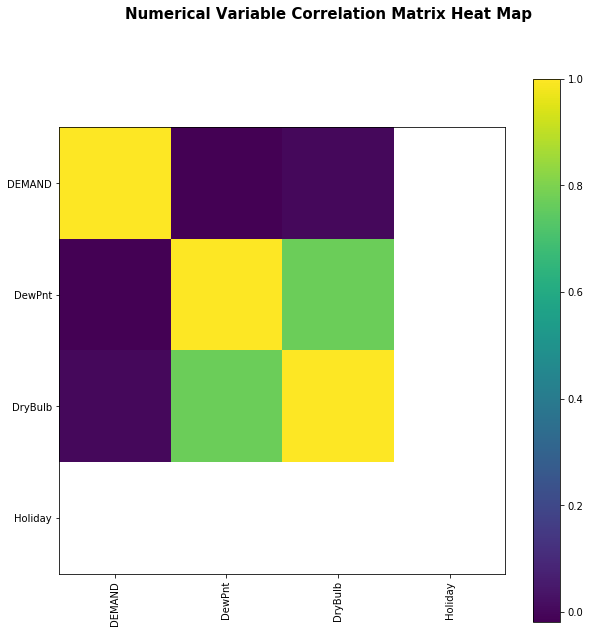

In [22]:
test_round_5 = pd.read_csv(os.path.join(test_data_dir, 'test_round_5.csv'))
test_round_5_tsdf = TimeSeriesDataFrame(test_round_5, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
test_round_5_tsdf.ts_report()

--------------------------------  Data Overview  ---------------------------------
<class 'ftk.time_series_data_frame.TimeSeriesDataFrame'>
MultiIndex: 7200 entries, (2017-04-01 01:00:00, ME) to (2017-05-01 00:00:00, TOTAL)
Data columns (total 4 columns):
DEMAND     7200 non-null float64
DewPnt     7200 non-null int64
DryBulb    7200 non-null int64
Holiday    7200 non-null int64
dtypes: float64(1), int64(3)
memory usage: 251.9+ KB
--------------------------  Numerical Variable Summary  --------------------------
        DEMAND  DewPnt  DryBulb  Holiday
count  7200.00 7200.00  7200.00  7200.00
mean   2976.08   38.25    50.47     0.00
std    3399.84    9.72    11.26     0.00
min     369.23    9.00    23.00     0.00
25%    1018.67   31.00    43.00     0.00
50%    1517.29   37.00    49.00     0.00
75%    3019.03   45.00    57.00     0.00
max   15544.69   65.00    87.00     0.00
------------------------------  Time Series Summary  -----------------------------
Number of time series         

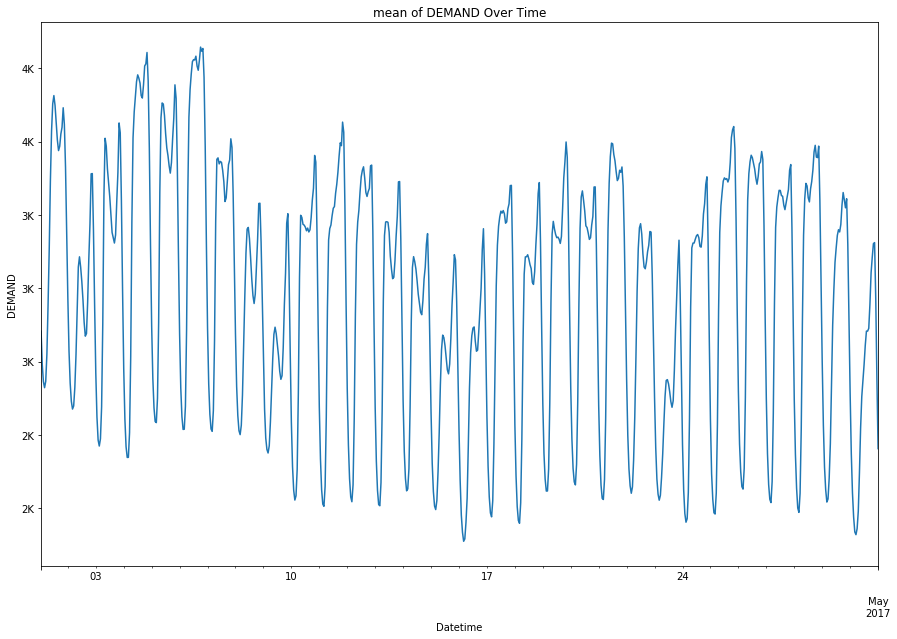

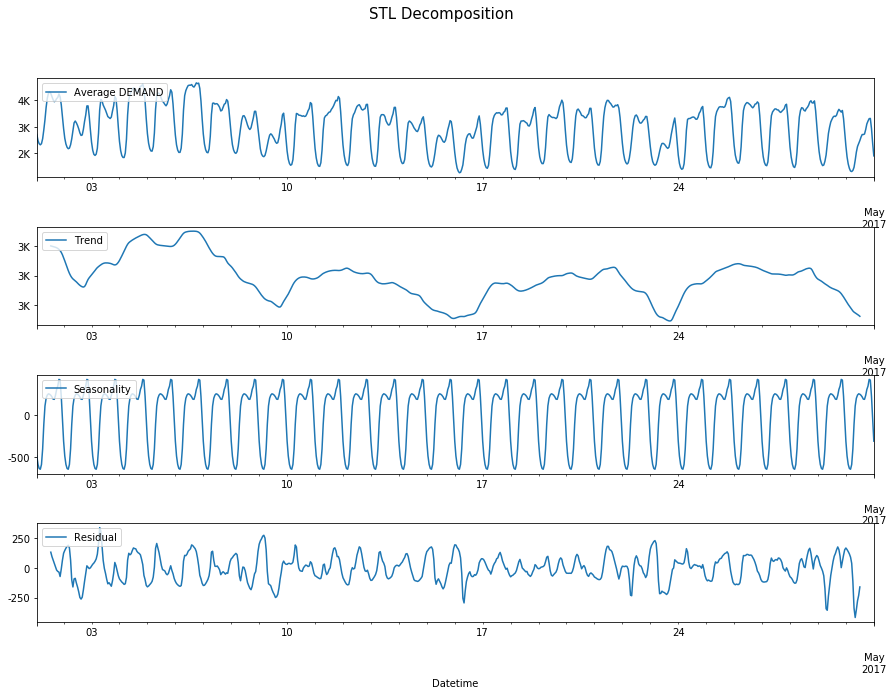

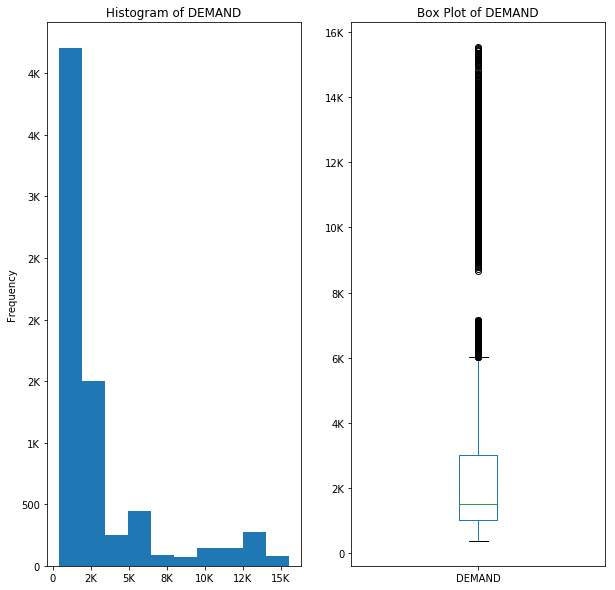

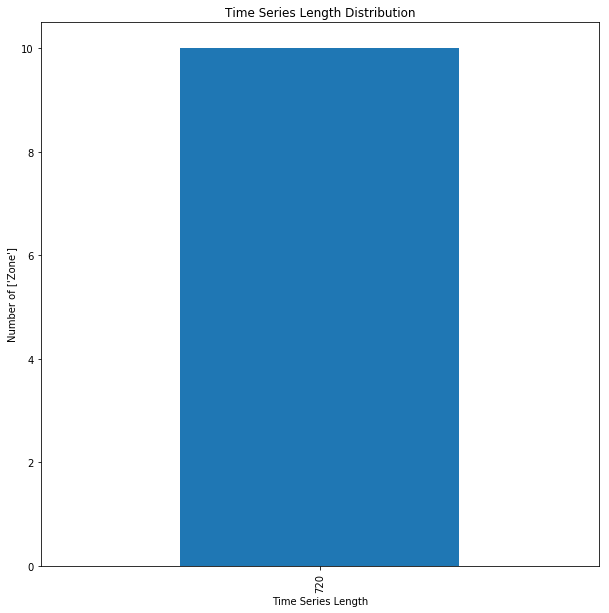

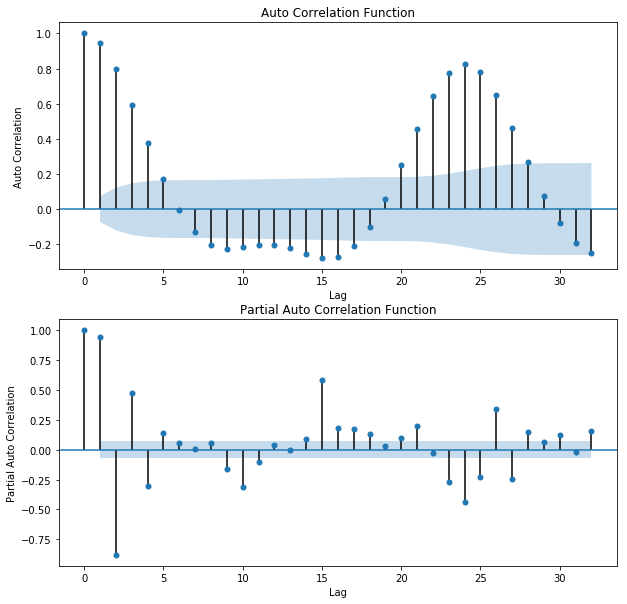

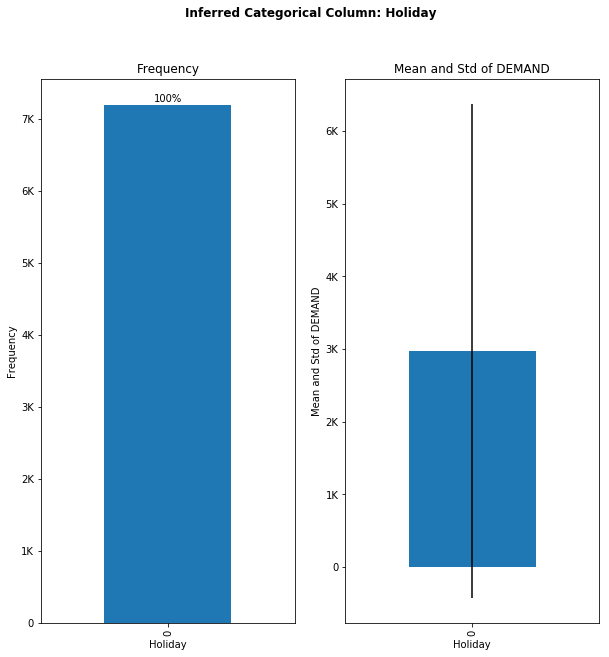

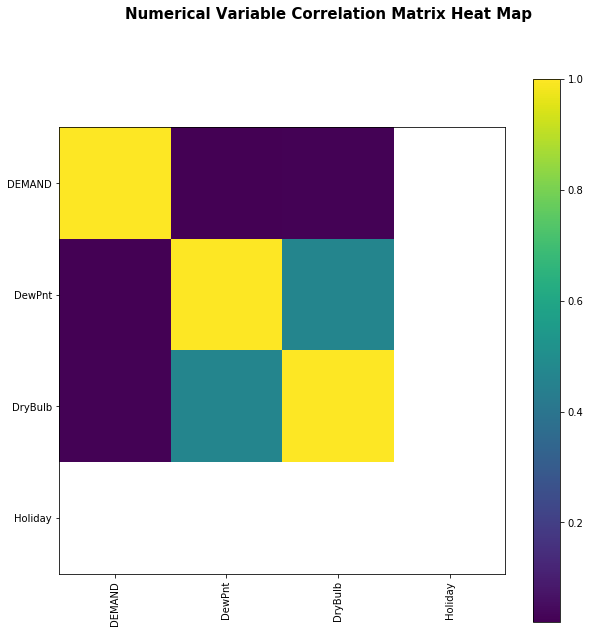

In [23]:
test_round_6 = pd.read_csv(os.path.join(test_data_dir, 'test_round_6.csv'))
test_round_6_tsdf = TimeSeriesDataFrame(test_round_6, grain_colnames=['Zone'], time_colname = 'Datetime', ts_value_colname = 'DEMAND')
test_round_6_tsdf.ts_report()